# 🛒 Tag suggestion

|   |   |
|---|---|
| Project  |    [nom du proj](#https://openclassrooms.com/fr/paths/148/projects/630/assignment)         |
| Date   |   February 2023   |
| Autor  | Ana Bernal                                                    |
| Data source | |
| Mentor | Samir Tanfous | 
| Notebook number  | _ of _                                                     |

**Description:** blabla

# Preliminaries
## Imports

In [1]:
# Built in
import re
import time

# Data
import pandas as pd

# Linear alg.
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.preprocessing import MultiLabelBinarizer

# Language/text
import spacy
from bs4 import BeautifulSoup
from spacy.symbols import ORTH


## Graphics and options

In [2]:
sns.set_style("whitegrid")

# Notes
# re.search(re.escape('c++'), 'hola como estan c++')

## Data

In [3]:
path = './data/'
filename = 'QueryResults.csv'

df = pd.read_csv(path + filename)

In [4]:
df.shape

(50000, 7)

In [5]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,AnswerCount
0,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,<java><multithreading><jakarta-ee><ejb-3.0><ejb>,3816286,9,13503,4
1,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,<javascript><json><node.js><base64><buffer>,22515180,14,23710,3
2,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,12489,69,142856,9
3,"Link error: ""Cannot find -ltinfo"" on Ubuntu 12...",<p>I get the following link error when I'm com...,<c++><ubuntu><arm><static-libraries><ubuntu-12...,21137879,21,17090,2
4,Android In App Updates - Not able to detect th...,"<p>Some log statements are thrown when we use,...",<android><google-play><google-play-services><a...,56581300,9,5122,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        50000 non-null  object
 1   Body         50000 non-null  object
 2   Tags         50000 non-null  object
 3   Id           50000 non-null  int64 
 4   Score        50000 non-null  int64 
 5   ViewCount    50000 non-null  int64 
 6   AnswerCount  50000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.7+ MB


In [7]:
df['Id'].nunique()

50000

In [8]:
df.set_index('Id', inplace=True)

In [9]:
df.head(3)

,Title,Body,Tags,Score,ViewCount,AnswerCount
Id,,,,,,
3816286,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,<java><multithreading><jakarta-ee><ejb-3.0><ejb>,9,13503,4
22515180,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,<javascript><json><node.js><base64><buffer>,14,23710,3
12489,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,69,142856,9


# Cleaning Tags column, counting tags

In [10]:
def simple_tokenize_tags(tag):
    '''
    Returns a list with more readable original 
    tags from StackOverflow. 

    Parameters:
        - tag: str

    ----------------------------------------------------------
    Example:
    tag = '<java><multithreading><jakarta-ee><ejb-3.0><ejb>'

    simple_tokenize_tags(tag) returns the list
    ['java', 'multithreading', 'jakarta-ee', 'ejb-3.0', 'ejb']
    ----------------------------------------------------------

    '''
    return tag.replace('><', ' ')[1:-1].split()

# Defining tags set

We define a tag set to work with. We would like to keep a limited number of the most popular tags.

In [11]:
df.head(3)

,Title,Body,Tags,Score,ViewCount,AnswerCount
Id,,,,,,
3816286,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,<java><multithreading><jakarta-ee><ejb-3.0><ejb>,9,13503,4
22515180,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,<javascript><json><node.js><base64><buffer>,14,23710,3
12489,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,69,142856,9


In [12]:
def clean_tags_column(df, old_tags_col):
    '''
    Adds a column to df with the clean tag form (as list)
    of the tags string in column old_tags_col.
    Removes the old tags column

    Parameters:
        - df: pandas.DataFrame
        - old_tags_col: str
            the label of the column containing string with tags.
    '''
    df['clean_Tags'] = df[old_tags_col].apply(lambda txt:simple_tokenize_tags(txt))
    df.drop(columns=old_tags_col, inplace=True)
    df.rename(columns={'clean_Tags' : 'Tags'}, inplace=True)

In [13]:
# Adding a column of clean_Tags which is a list of tags
clean_tags_column(df, 'Tags')

In [14]:
df.head(3)

,Title,Body,Score,ViewCount,AnswerCount,Tags
Id,,,,,,
3816286,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,9,13503,4,"[java, multithreading, jakarta-ee, ejb-3.0, ejb]"
22515180,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,14,23710,3,"[javascript, json, node.js, base64, buffer]"
12489,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,69,142856,9,"[c, file, directory, cross-platform, common-ta..."


We study some statistics in the whole set of tags to understand.

In [19]:
# Creating the set of all tags appearing in the sample of
# size 50 000
all_tags = set()

for tags in df['Tags']:
    all_tags = all_tags.union(set(tags))

In [20]:
# Different tags as a list
all_tags = list(all_tags)

# Counting questions per tag
all_tags_count = dict(zip(all_tags,np.zeros(len(all_tags))))

for tags in df['Tags']:
    for tag in tags:
        all_tags_count[tag] += 1

# Array counting # of questions per tag
tags_count = np.array(list(all_tags_count.values()))

print(f'There are {len(all_tags)} different tags.')
print(f'The mean of # of questions per tag is: {np.mean(tags_count)}')
print(f'The minimum # of questions per tag is: {np.min(tags_count)} (by constr.)')
print(f'The max # of questions per tag is: {np.max(tags_count)}.')
print(f'25% of tags appear in {np.quantile(tags_count, 0.25)} question.')
print(f'50% of tags appear in {np.quantile(tags_count, 0.5)} questions or less.')
print(f'75% of tags appear in {np.quantile(tags_count, 0.75)} questions or less.')


There are 18409 different tags.
The mean of # of questions per tag is: 13.58042261937096
The minimum # of questions per tag is: 1.0 (by constr.)
The max # of questions per tag is: 6226.0.
25% of tags appear in 1.0 question.
50% of tags appear in 2.0 questions or less.
75% of tags appear in 6.0 questions or less.


In [21]:
df.head()

,Title,Body,Score,ViewCount,AnswerCount,Tags
Id,,,,,,
3816286,Multithreading in a stateless session bean?,<p>The EJB 3.0 specification does not allow a ...,9,13503,4,"[java, multithreading, jakarta-ee, ejb-3.0, ejb]"
22515180,base64 JSON encoded strings in nodejs,<p>How do I create a base64 JSON encoded strin...,14,23710,3,"[javascript, json, node.js, base64, buffer]"
12489,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,69,142856,9,"[c, file, directory, cross-platform, common-ta..."
21137879,"Link error: ""Cannot find -ltinfo"" on Ubuntu 12...",<p>I get the following link error when I'm com...,21,17090,2,"[c++, ubuntu, arm, static-libraries, ubuntu-12..."
56581300,Android In App Updates - Not able to detect th...,"<p>Some log statements are thrown when we use,...",9,5122,3,"[android, google-play, google-play-services, a..."


We now choose the more popular tags

In [27]:
# Fixing a minimal number of questions for considering
# a tag "popular"
numb_quest = 1900
popular_tags = { key:value for (key,value) in all_tags_count.items() if value >numb_quest}

# Sorting popular tags decreasingly
popular_tags = {k: v for k, v in sorted(popular_tags.items(), key=lambda item: item[1], reverse=True)}

print(f'The total # of popular tags is {len(popular_tags)}')
print(f'(appearing in more than {numb_quest} questions)')
print('-'*35)
print('Tag \t\t # of quest')
print('-'*35)
for (key,value) in popular_tags.items():
    print(f'{key:>10} \t {value}')


The total # of popular tags is 10
(appearing in more than 1900 questions)
-----------------------------------
Tag 		 # of quest
-----------------------------------
        c# 	 6226.0
      java 	 5880.0
javascript 	 4920.0
    python 	 4747.0
       c++ 	 3904.0
       ios 	 3449.0
   android 	 3223.0
      .net 	 3164.0
      html 	 2197.0
       php 	 2050.0


In [28]:
def plot_numb_popular_tags(popular_tags,n):
        '''
        Bar plot illustrating the number of questions
        per each popular tag, for n the most popular tags.

        Parameters:
                - popular_tags : dict
                        keys: the labels of popular tags
                        values: number of questions tagged with tag.
                - n : int
        '''
        
        fig, ax = plt.subplots()
        ax.barh(width=list(popular_tags.values())[:n],
                y=range(n)[::-1],
                color='blueviolet',
                alpha=0.7,
                tick_label=list(popular_tags.keys())[:n]
                )
        plt.title(f'Most popular {n} tags', fontsize=13)
        plt.xlabel('# of questions containing tag')
        ax.grid(axis='y')

        plt.show()


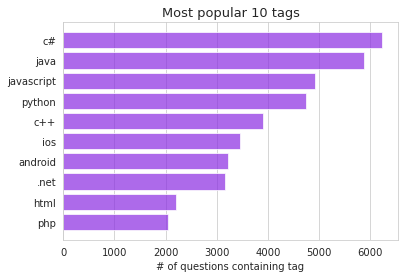

In [29]:
# Plotting the 10 most popular tags
plot_numb_popular_tags(popular_tags, 10)

## Mini-example

In [30]:
df_ex = df.sample(3)

In [31]:
df_ex

,Title,Body,Score,ViewCount,AnswerCount,Tags
Id,,,,,,
2949992,How do I remove separation between rows in a H...,<p>I have a html table with 3 rows and 1 colum...,8,43738,6,"[html, image, html-table, margin, padding]"
24659814,How to write a numpy array to a csv file?,<p>I want to open up a new text file and then ...,8,28814,1,"[python, arrays, csv, numpy, python-3.4]"
8333507,How to copy and paste files in Compile Sources...,<p>I have a main target that have certain file...,17,6391,3,"[xcode, build, compilation, include, target]"


In [32]:
for tags in df_ex['Tags']:
    print(tags)

['html', 'image', 'html-table', 'margin', 'padding']
['python', 'arrays', 'csv', 'numpy', 'python-3.4']
['xcode', 'build', 'compilation', 'include', 'target']


In [33]:
my_list = ['html', 'padding','python', 'csv', 'xcode' ]

In [34]:
df_ex.Tags.explode()

Id
2949992            html
2949992           image
2949992      html-table
2949992          margin
2949992         padding
24659814         python
24659814         arrays
24659814            csv
24659814          numpy
24659814     python-3.4
8333507           xcode
8333507           build
8333507     compilation
8333507         include
8333507          target
Name: Tags, dtype: object

In [35]:
df_ex.Tags.explode().isin(my_list)

Id
2949992      True
2949992     False
2949992     False
2949992     False
2949992      True
24659814     True
24659814    False
24659814     True
24659814    False
24659814    False
8333507      True
8333507     False
8333507     False
8333507     False
8333507     False
Name: Tags, dtype: bool

In [36]:
df_ex.Tags.explode()[df_ex.Tags.explode().isin(my_list)]

Id
2949992        html
2949992     padding
24659814     python
24659814        csv
8333507       xcode
Name: Tags, dtype: object

In [43]:
my_series = df_ex.Tags.explode()[df_ex.Tags.explode().isin(my_list)]
my_series = my_series.groupby(by=my_series.index).apply(list)

In [44]:
my_series

Id
2949992     [html, padding]
8333507             [xcode]
24659814      [python, csv]
Name: Tags, dtype: object

In [45]:
type(my_series[2949992])

list

In [120]:
pd.merge(left=df_ex, right=my_series, how='right', left_index=True, right_index=True, suffixes=('_original',None))

,Title,Body,Score,ViewCount,AnswerCount,Tags_original,text,processed_text,Tags
Id,,,,,,,,,
8741000,HTML5 Web SQL Transactions skipped without err...,<p>I'm experiencing problems making database t...,11,5617,2,"[javascript, ios, html]",HTML5 Web SQL Transactions skipped without err...,html web sql transactions error touch ios prob...,"[javascript, ios, html]"
19543997,Why does the string returned by ctime() contai...,<p>Why does the string returned by <code>ctime...,51,5887,6,[c++],Why does the string returned by ctime() contai...,string ctime line feed string line feed charac...,[c++]
31593119,vshost.exe not terminating properly in Visual ...,<p>I am in charge of testing VS 2015 and how i...,11,3685,2,[c#],vshost.exe not terminating properly in Visual ...,visual studio charge vs application employer v...,[c#]


In [55]:
def filter_popular_tags(df,tags,pop_tags):
    '''
    Returns a dataframe with filtered tags:
    it keeps only tags in the list pop_tags and
    removes the rest of the tags. Removes rows without
    popular tags.

    Parameters:
        - df: pd.DataFrame
        - pop_tags: list of str
            list of popular tags to keep.
        - tags: str
            label of the tags column in df.
    '''
    # Exploding series of tags as rows (preserves the index)
    tags_series = df[tags].explode()

    # Boolean of preceding series: True if tag is popular
    is_pop_tag = tags_series.isin(pop_tags)

    # Series of tags for which True
    pop_tags_series = tags_series[is_pop_tag]

    # Groupby of this series to go back to a list of tags
    pop_tags_series = pop_tags_series.groupby(by=pop_tags_series.index).agg(list)

    # Merge with dataframe to keep only popular tags
    pop_tags_df = pd.merge(left=df, 
                           right=pop_tags_series, 
                           how='right', 
                           left_index=True, 
                           right_index=True, 
                           suffixes=('_old',None))
    pop_tags_df.drop(columns=[tags+'_old'], inplace=True)

    return pop_tags_df

In [54]:
# Testing function
filter_popular_tags(df_ex,'Tags',my_list)

,Title,Body,Score,ViewCount,AnswerCount,Tags
Id,,,,,,
2949992,How do I remove separation between rows in a H...,<p>I have a html table with 3 rows and 1 colum...,8,43738,6,"[html, padding]"
8333507,How to copy and paste files in Compile Sources...,<p>I have a main target that have certain file...,17,6391,3,[xcode]
24659814,How to write a numpy array to a csv file?,<p>I want to open up a new text file and then ...,8,28814,1,"[python, csv]"


We now filter our dataset to keep only popular tags

In [56]:
print(f'Dataset shape before filter : {df.shape}')

# Filtering popular tags
popular_tags = list(popular_tags.keys())
df = filter_popular_tags(df,'Tags',popular_tags)

print(f'Dataset shape after filter : {df.shape}')

Dataset shape before filter : (50000, 6)
Dataset shape after filter : (33729, 6)


## Creating target columns

We now encode the tags into columns: one column for each one of the popular tags. In each column there are binary values: 1 if the corresponding tag is in the document and 0 otherwise.

In [12]:
print(popular_tags)

['c#', 'java', 'javascript', 'python', 'c++', 'ios', 'android', '.net', 'html', 'php']


In [11]:
# popular_tags = ['c#','java','javascript','python','c++','ios','android','.net','html','php']  

In [15]:
type(popular_tags)

list

In [59]:
mlb = MultiLabelBinarizer(classes=popular_tags)
mlb.fit([popular_tags])

MultiLabelBinarizer(classes=['c#', 'java', 'javascript', 'python', 'c++', 'ios',
                             'android', '.net', 'html', 'php'])

In [60]:
mlb.classes_

array(['c#', 'java', 'javascript', 'python', 'c++', 'ios', 'android',
       '.net', 'html', 'php'], dtype=object)

In [61]:
# Appending columns of binarized tags
col_names = ['tag_'+tag for tag in mlb.classes_]
df[col_names] = mlb.transform(df['Tags'])

In [71]:
df.sample(4)

,Title,Body,Score,ViewCount,AnswerCount,Tags,tag_c#,tag_java,tag_javascript,tag_python,tag_c++,tag_ios,tag_android,tag_.net,tag_html,tag_php
Id,,,,,,,,,,,,,,,,
37285366,Green threads in .NET,<p>Green threads were introduced in Erlang and...,26,5415,3,[.net],0,0,0,0,0,0,0,1,0,0
48267256,Google Tag Manager with Comodo SSL Trusted Sit...,<p>I'm currently in the process making Google ...,6,274,1,"[javascript, html]",0,0,1,0,0,0,0,0,1,0
37488090,Create keystore file with one command,<p>I have a script which creates and signs a k...,21,49317,1,"[java, android]",0,1,0,0,0,0,1,0,0,0
21811789,Android connection to localhost,<p>I'm trying to connect my android applicatio...,22,76524,9,"[java, android]",0,1,0,0,0,0,1,0,0,0


# Processing title and body text

In [73]:
def remove_code(text):
    """
    Removes "<code> some text </code>" from a text.

    Parameters
        - text : str
    """
    soup = BeautifulSoup(text,'lxml')
    code_to_remove = soup.findAll('code')
    for code in code_to_remove:
        code.replace_with(' ')
    return str(soup)

We now add stopwords to the default english tokenizer stopword set. Our set of stopwords can be find in this [github repository](#https://github.com/Alir3z4/stop-words/blob/master/english.txt).

In [75]:
# Instantiating language model, english
nlp = spacy.load("en_core_web_sm")

# Importing stopwords
with open('./stopwords/stopwords.txt') as file:
    my_stopwords = {line.rstrip() for line in file}

# print # of stopwords
print(f'The default spacy stopwords set contains {len(nlp.Defaults.stop_words)} stopwords.')
print(f'This file contains {len(my_stopwords)} stopwords.')
print('The first 10 stopwords are:')
print(list(my_stopwords)[:10])


The default spacy stopwords set contains 326 stopwords.
This file contains 1298 stopwords.
The first 10 stopwords are:
['provides', 'ill', 'sa', 'through', 'downed', 'something', 'facts', 'thick', 'do', 'length']


In [32]:
# Adding my_stopwords to spacy stopwords
nlp.Defaults.stop_words = nlp.Defaults.stop_words.union(my_stopwords)

# Checking new size of stopwords
print(f'we use {len(nlp.Defaults.stop_words)} in total.')

we use 1317 in total.


In [76]:
def clean(text,tokenize=False,strict=False, **kwargs):
    """
    Returns a dictionnary with keys 'text' or 'tokens', where
    'tokens' corresponds tothe list of lemmatized tokens from
    the string text. Ommiting stopwords and punctuation, and the text is
    the joint text.

    Parameters:
        - text: str
        - tokenize: bool
            If True returns list of tokens, if False returns string.
        - strict: bool
            If true only keeps nouns
    """


    # Removing <code>some code</code>
    clean_txt = remove_code(text)

    # Removing HTML tags
    soup = BeautifulSoup(clean_txt, features='html.parser')
    clean_txt = soup.get_text()

    # Removing new line character: \n
    clean_txt = clean_txt.replace('\n', ' ')

    # Removing unicode characters
    clean_txt = clean_txt.encode("ascii", "ignore").decode()
    
    # Removing digits
    clean_txt = ''.join(char for char in clean_txt if not char.isdigit())

    # Replacing 'c ++' and 'c #' for 'c++' and 'c#'
    clean_txt = clean_txt.replace('c ++', 'c++')
    clean_txt = clean_txt.replace('c #', 'c#')
    clean_txt = clean_txt.replace('C ++', 'c++')
    clean_txt = clean_txt.replace('C #', 'c#')
    clean_txt = clean_txt.replace('C#', 'c#')
    clean_txt = clean_txt.replace('C ++', 'c++')

    # Adding special case rule
    special_case = [{ORTH: "c#"}] 
    nlp.tokenizer.add_special_case("c#", special_case)
    
    # Tokenize with spacy
    doc = nlp(clean_txt)

    # Tokenize properties
    if strict == True:
        tokens = [token.lemma_.lower() for token in doc
                    if token.pos_ in ['NOUN', 'PROPN'] and
                        (not (token.is_stop or 
                              token.is_punct or
                              token.is_space
                              )
                        )
                 ]    
    else:
        tokens = [token.lemma_.lower() for token in doc
                    if not (token.is_stop or 
                            token.is_punct or
                            token.is_space
                            )
                 ]

    clean_txt = ' '.join(tokens)
    
    # Ask if return text or tokens
    if tokenize == True:
        result = tokens
    else:
        result = clean_txt

    # Option for list of entities in output
    if 'ent' in kwargs:
        result = {'output':result, 'ents': doc.ents}

    return result

In [77]:
clean("Hi i'm currently studying c++, c#, sometimes c # and i love .net", tokenize=False, strict=False)

'hi currently study c++ c# c# love .net'

Let us test this function with two examples:

**Example 1:**

In [46]:
# Sample text
sample_text = df.loc[11, 'Body']
sample_text

'<p>Given a specific <code>DateTime</code> value, how do I display relative time, like:</p>\n<ul>\n<li><code>2 hours ago</code></li>\n<li><code>3 days ago</code></li>\n<li><code>a month ago</code></li>\n</ul>\n'

In [47]:
clean(sample_text, tokenize=False, strict=False)

'give specific value display relative time like'

In [48]:
print(clean(sample_text, tokenize=True, strict=False))

['give', 'specific', 'value', 'display', 'relative', 'time', 'like']


Tokens:

Using the `strict=True` condition

In [51]:
clean(sample_text, tokenize=False, strict=True)

'value time'

In [52]:
print(clean(sample_text, tokenize=True, strict=True))

['value', 'time']


Entities: (NER)

In [53]:
clean(sample_text, tokenize=True, ent=True, strict=False)['ents']

()

**Example 3** An example with code on the body

In [54]:
sample_text = df.loc[37242063, 'Body']
sample_text

'<p>I\'m using Odoo 8 version.</p>\n\n<p>I have created a new model called <em>enquiry_customer_date</em></p>\n\n<p>In that model, I have set following four fields. </p>\n\n<ul>\n<li>partner_id (many2one), </li>\n<li>enquiry_date (date),</li>\n<li>file_name (char) and</li>\n<li>excel_file (binary)</li>\n</ul>\n\n<p>I have given mention model one2many relationship with <em>res.partner</em> model</p>\n\n<p>I have used below code for display records.</p>\n\n<pre><code>&lt;field name="enquiry_from_customer_ids"&gt;\n    &lt;tree string="Enquiry Lines"&gt;\n        &lt;field name="enquiry_date"/&gt;\n        &lt;field name="file_name" invisible="1"/&gt;\n        &lt;field name="excel_file" filename="file_name"/&gt;\n    &lt;/tree&gt;    \n&lt;/field&gt;\n</code></pre>\n\n<p>This will display correct file name in list view.</p>\n\n<p><strong>Face Problem:</strong></p>\n\n<p>When I download link, it stores with file name = base64 with <em>.bin</em> extension.</p>\n\n<p><strong>Question</stron

In [55]:
clean(sample_text, tokenize=False,strict=False)

'odoo version create new model call enquiry_customer_date model set follow field partner_id manyone enquiry_date date file_name char excel_file binary give mention model onemany relationship res.partner model code display record display correct file list view face problem download link store file = base .bin extension question work download link uploaded file extension onemany field update try @danidee answer system configuration parameter treeview listview onemany field output expect output file download openerp_customization_needed.txt'

In [56]:
clean(sample_text, tokenize=False,strict=True)

'odoo version model enquiry_customer_date model field partner_id manyone enquiry_date date file_name char binary mention model onemany relationship res.partner model code display record file list view problem link file = base .bin extension question download link file extension onemany field @danidee answer system configuration parameter treeview listview onemany field output output file openerp_customization_needed.txt'

## Processing text

We first create a column of text concatenating the title and the body. And then we process that column with our `clean` function to finally process the text.

In [58]:
df.head()

,Title,Body,Score,ViewCount,AnswerCount,Tags,text
Id,,,,,,,
4,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,792,70052,14,[c#],How to convert Decimal to Double in C#? <p>I w...
11,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,1644,196587,41,[c#],Calculate relative time in C# <p>Given a speci...
13,Determine a user's timezone,<p>Is there a standard way for a web server to...,698,274233,27,[html],Determine a user's timezone <p>Is there a stan...
25,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,175,15797,9,[c++],How to use the C socket API in C++ on z/OS <p>...
109,Decoding T-SQL CAST in C#/VB.NET,<p>Recently our site has been deluged with the...,69,6068,2,[c#],Decoding T-SQL CAST in C#/VB.NET <p>Recently o...


In [85]:
# Concatenating title and body
df.insert(0,'text',df['Title'] + ' ' + df['Body'])

Let us see the lengths of the text to be processed and based on the distribution of the lengths, restrict ourselves to posts up to a certain length of characters.

In [79]:
# Statistics for the length of text (title+body)
df.text.str.len().describe()

count    33729.000000
mean      1790.281627
std       2169.692069
min         57.000000
25%        679.000000
50%       1174.000000
75%       2075.000000
max      37387.000000
Name: text, dtype: float64

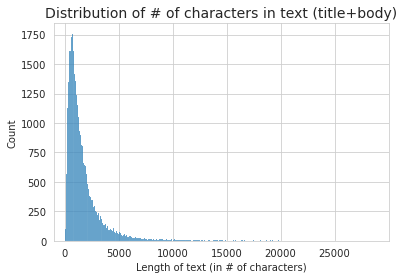

In [80]:
# Plotting distribution of length of text
h = sns.histplot(df.text.str.len())
plt.title('Distribution of # of characters in text (title+body)', size=14)
plt.xlabel('Length of text (in # of characters)')
h.set_xlim(-1000,30000)
h.set_xticks(range(0,30000,5000))
plt.show()

To keep a set of documents which is more uniform, we keep only text with a number of characters between 1 and 5000.

In [81]:
df.loc[df.text.str.len() <= 5000].shape


(31929, 17)

In [82]:
shape_before = df.shape
print(f'Shape of dataset before filter: {shape_before}')
df = df.loc[df.text.str.len() <= 5000]
shape_after = df.shape
print(f'Shape of dataset after filter: {shape_after}')
print(f'Number of deleted rows: {shape_before[0] - shape_after[0]}')

Shape of dataset before filter: (33729, 17)
Shape of dataset after filter: (31929, 17)
Number of deleted rows: -1800


In [89]:
# Cleaning/tokenizing the text
start = time.time()
processed_text = df['text'].apply(lambda txt:clean(txt, tokenize=False, strict=True))
end = time.time()
df.insert(0,'processed_text', processed_text)
total_time = end - start
print(f'Total time to process text: {total_time} seconds. (= {total_time/60} minutes)')

Total time to process text: 867.8656282424927 seconds. (= 14.464427137374878 minutes)


In [90]:
df.head()

,processed_text,text,Title,Body,Score,ViewCount,AnswerCount,Tags,tag_c#,tag_java,tag_javascript,tag_python,tag_c++,tag_ios,tag_android,tag_.net,tag_html,tag_php
Id,,,,,,,,,,,,,,,,,,
4,decimal c# variable opacity app error type,How to convert Decimal to Double in C#? <p>I w...,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,792,70052,14,[c#],1,0,0,0,0,0,0,0,0,0
11,time c# value time,Calculate relative time in C# <p>Given a speci...,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,1644,196587,41,[c#],1,0,0,0,0,0,0,0,0,0
13,user timezone way web server user timezone web...,Determine a user's timezone <p>Is there a stan...,Determine a user's timezone,<p>Is there a standard way for a web server to...,698,274233,27,[html],0,0,0,0,0,0,0,0,1,0
25,c socket api c++ z os issue c socket api c++ z...,How to use the C socket API in C++ on z/OS <p>...,How to use the C socket API in C++ on z/OS,<p>I'm having issues getting the C sockets API...,175,15797,9,[c++],0,0,0,0,1,0,0,0,0,0
109,t sql cast c#/vb.net site resurgence asprox sq...,Decoding T-SQL CAST in C#/VB.NET <p>Recently o...,Decoding T-SQL CAST in C#/VB.NET,<p>Recently our site has been deluged with the...,69,6068,2,[c#],1,0,0,0,0,0,0,0,0,0


# Export processed data

In [92]:
# Export processed data
path = './data/'
filename = 'processed_data_v01.csv'

df.to_csv(path + filename)